In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
df=pd.read_csv('customer_data csv file.csv')

In [118]:
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [120]:
df.isnull().sum()

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

In [121]:
df.shape

(100000, 12)

In [122]:
import seaborn as sns

<Axes: >

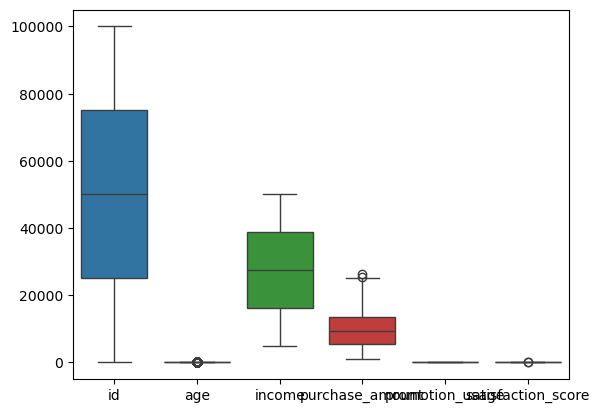

In [123]:
sns.boxplot(data=df[['id','age','income','purchase_amount','promotion_usage','satisfaction_score']])


In [124]:
df.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


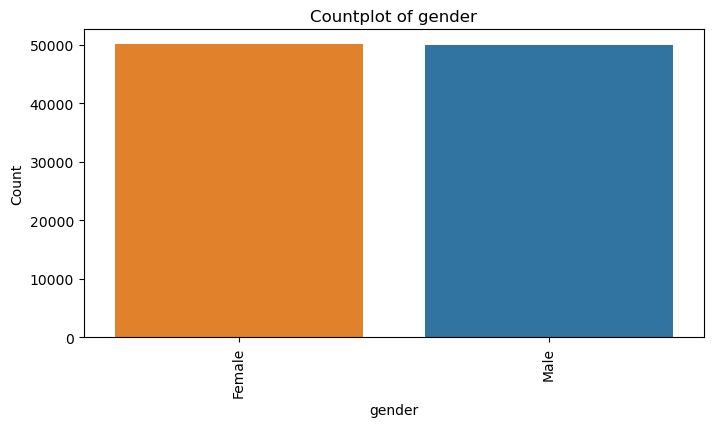

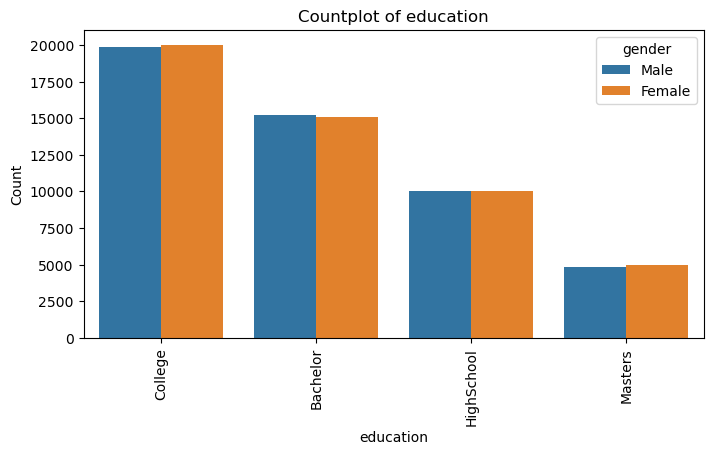

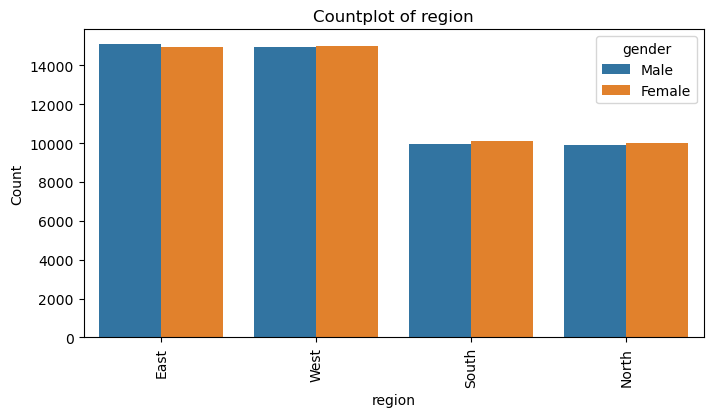

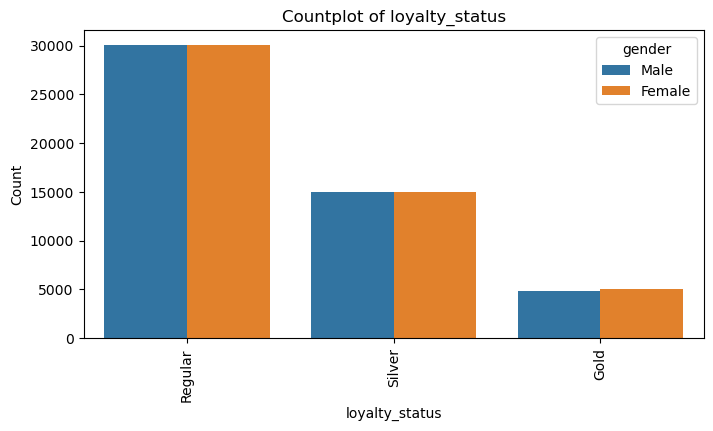

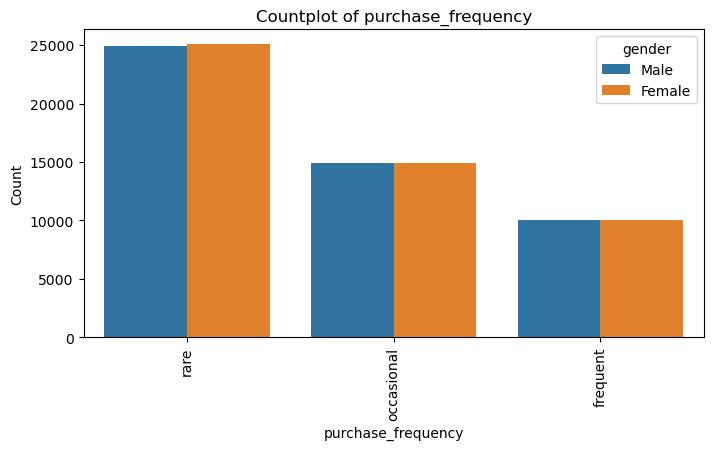

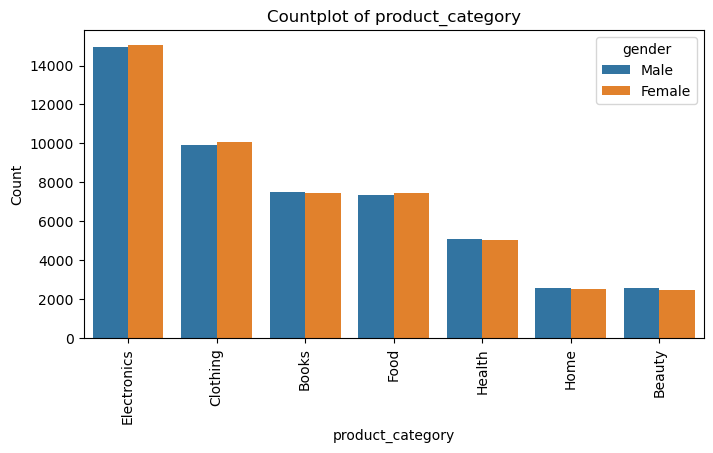

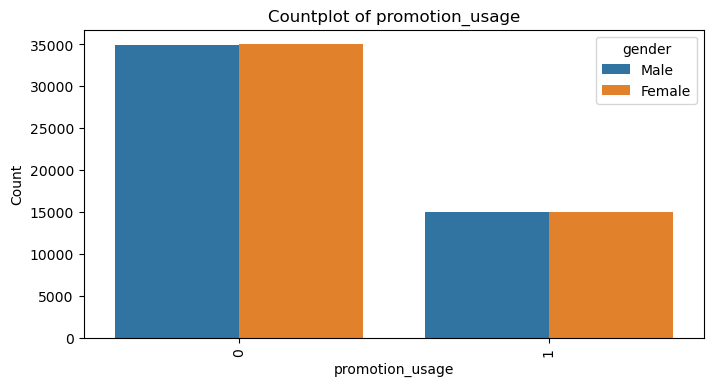

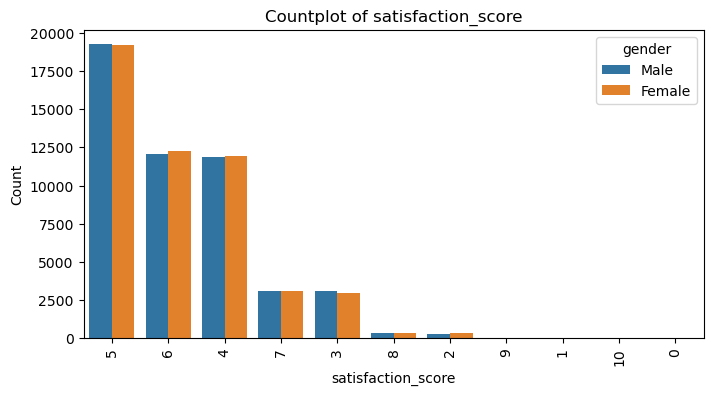

In [127]:
categorical_cols = [
    'gender','education','region','loyalty_status','purchase_frequency','product_category','promotion_usage','satisfaction_score'
]
for col in categorical_cols:
    
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col,order=df[col].value_counts().index,hue='gender')
    plt.title(f"Countplot of {col}")
 
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90)

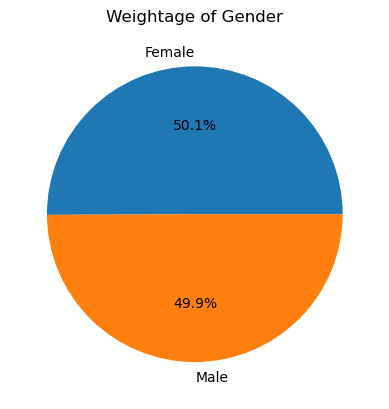

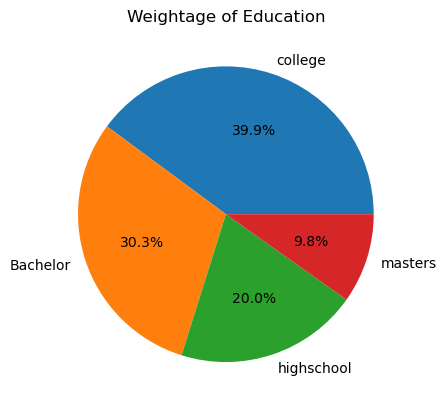

In [89]:
gender = df['gender'].value_counts()
plt.pie(gender, autopct='%1.1f%%', labels=['Female', 'Male'])
plt.title('Weightage of Gender')
plt.show()
gender = df['education'].value_counts()
plt.pie(gender, autopct='%1.1f%%',labels=['college','Bachelor','highschool','masters'])
plt.title('Weightage of Education')
plt.show()

Text(0.5, 1.02, 'Distibution  of Numerical Features')

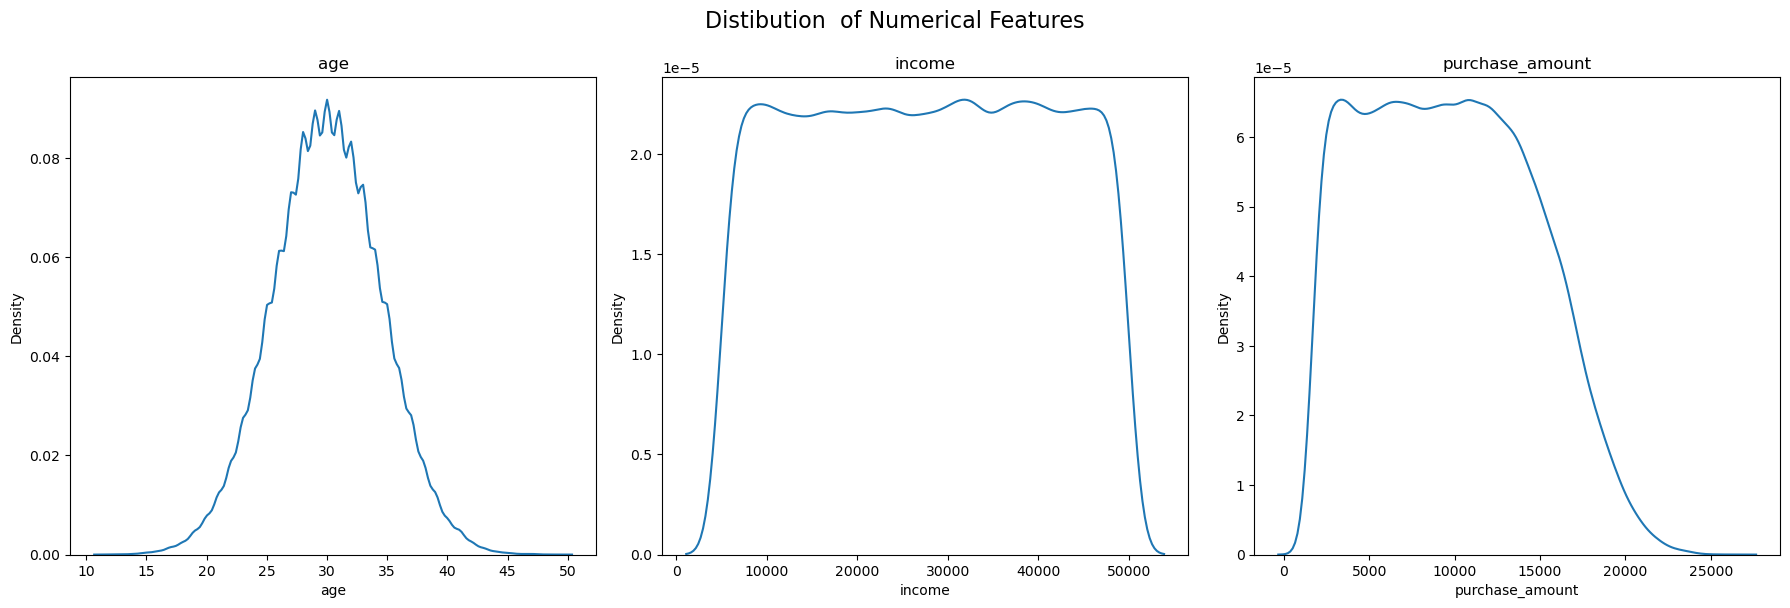

In [128]:
numerical_cols = [
   'age', 'income','purchase_amount'
]



plt.figure(figsize=(18, 16))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i) 
    sns.kdeplot(x=df[col])
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Distibution  of Numerical Features", fontsize=16, y=1.02)

Generating Numerical vs Numerical scatter plots...


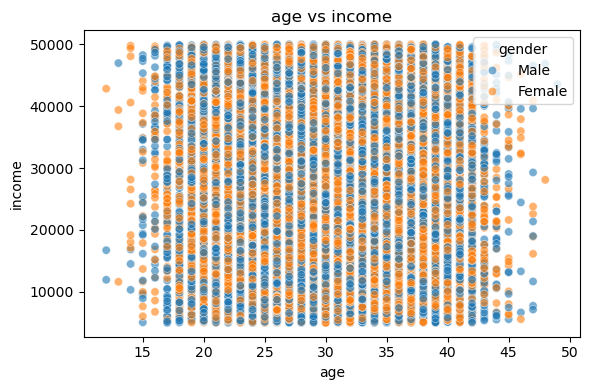

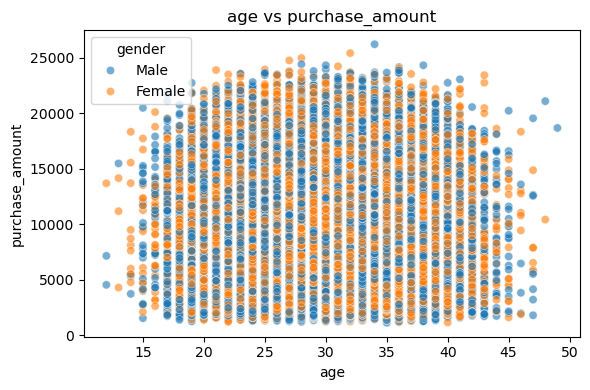

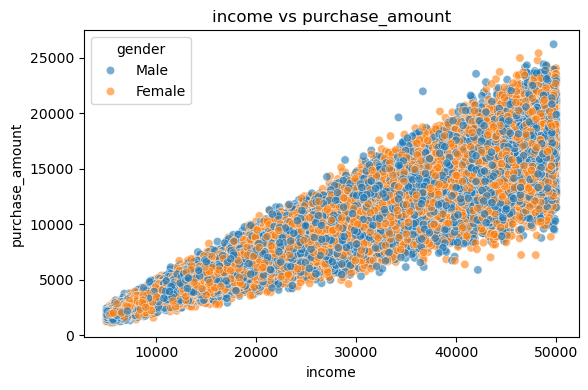

Generating Numerical vs Categorical box plots...


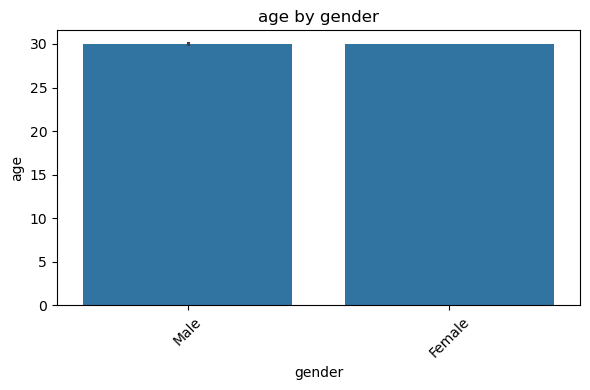

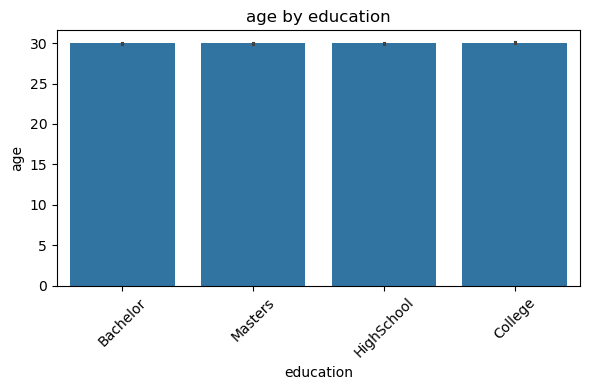

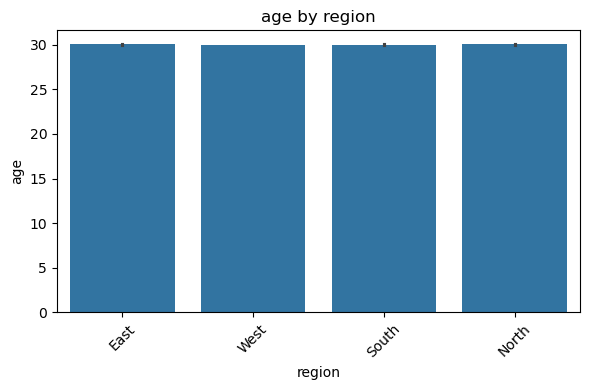

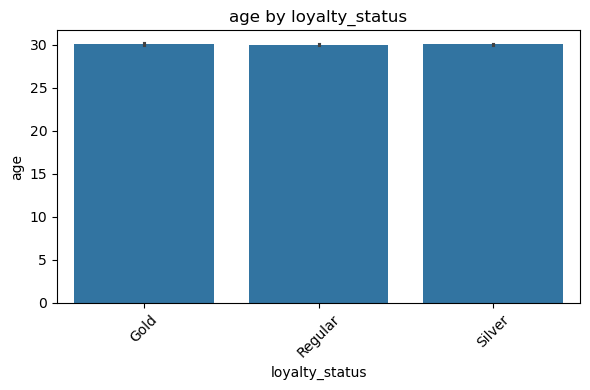

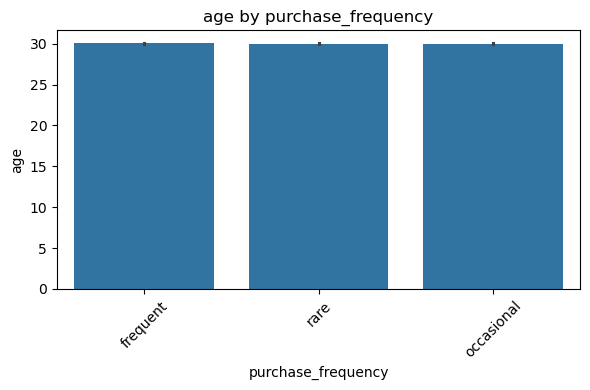

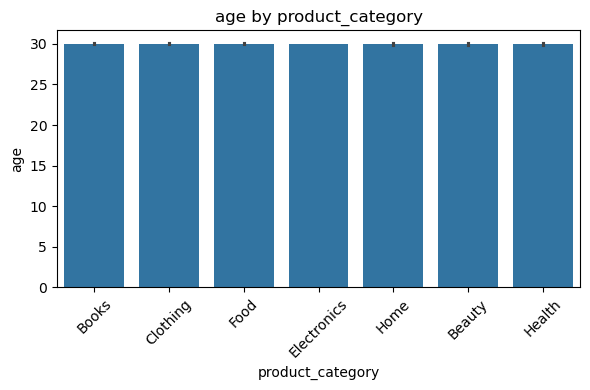

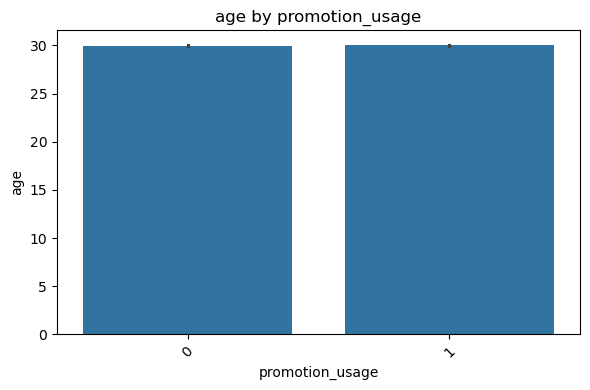

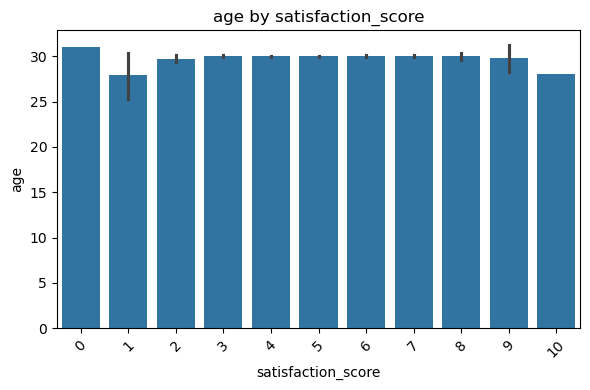

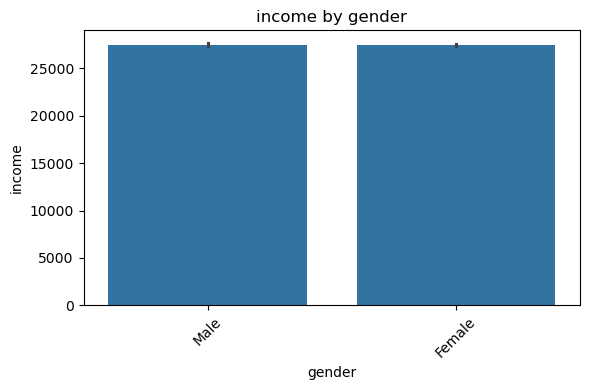

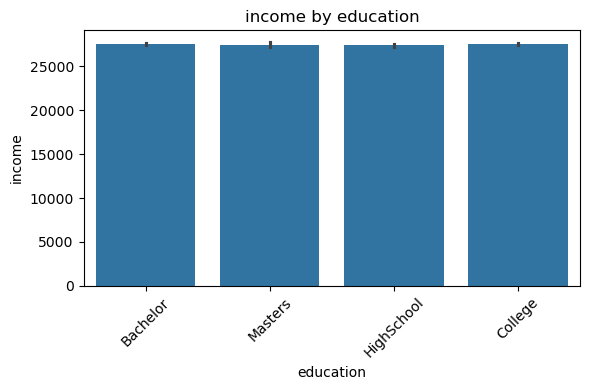

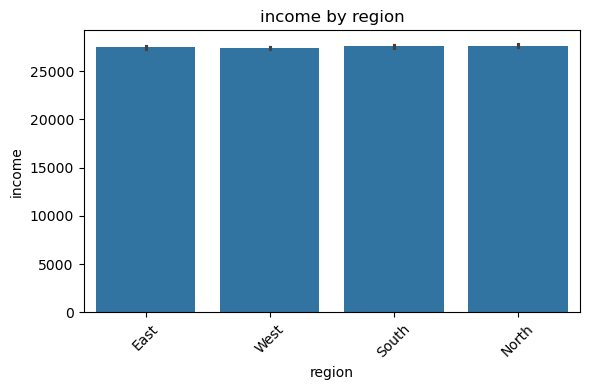

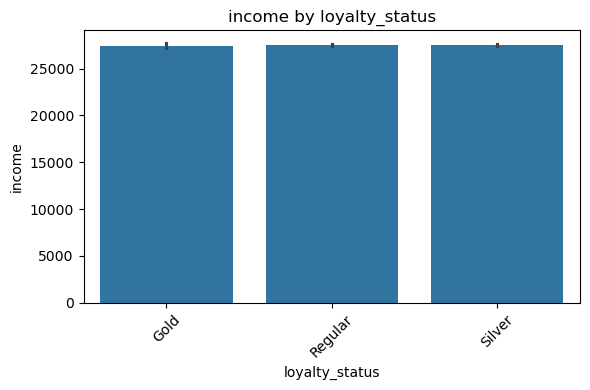

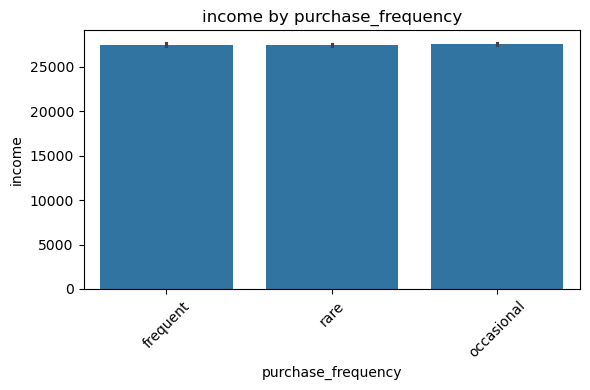

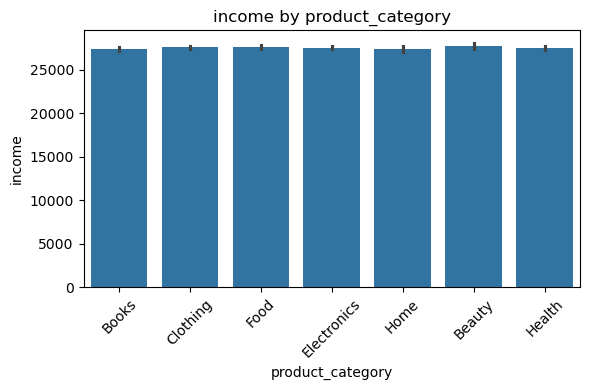

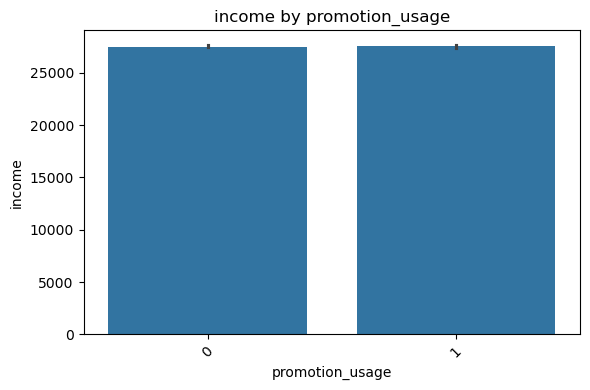

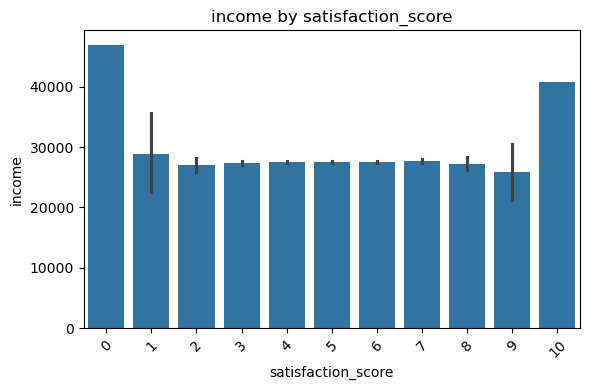

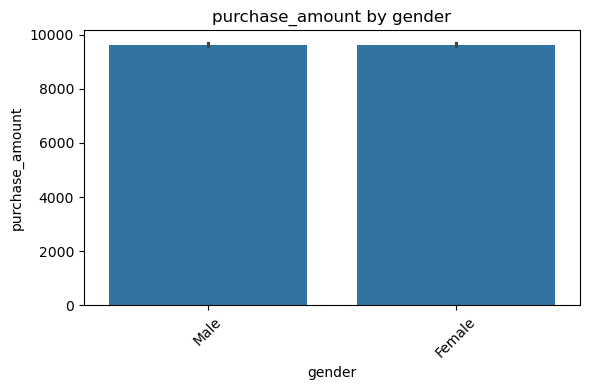

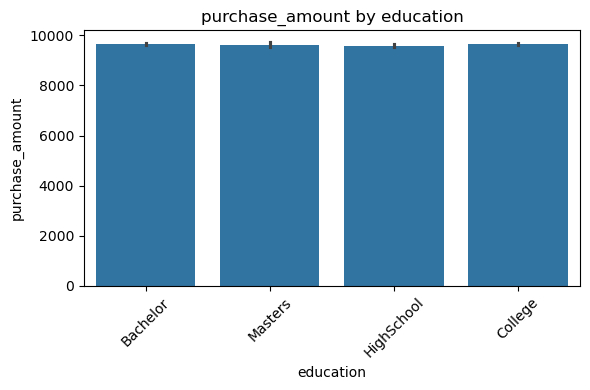

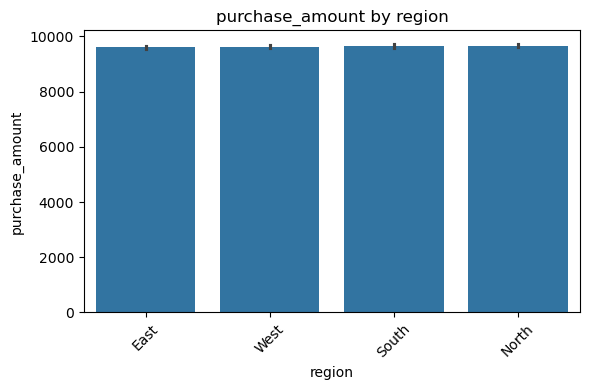

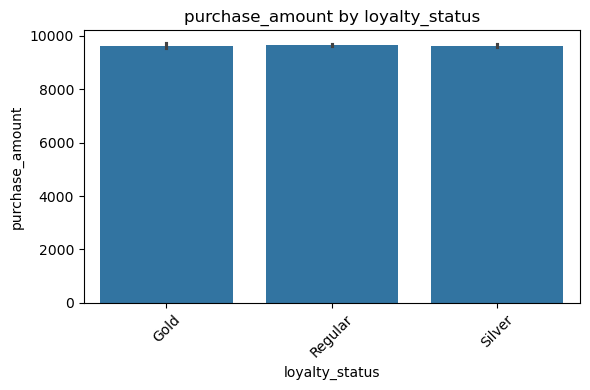

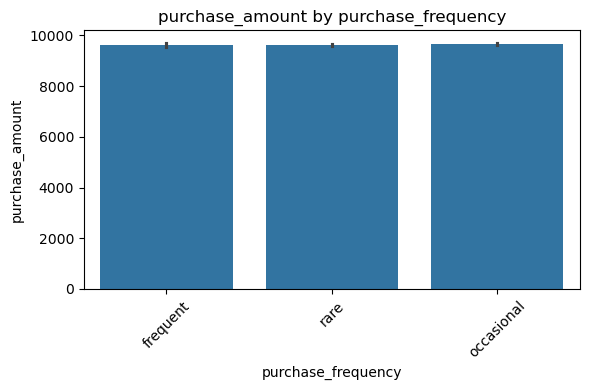

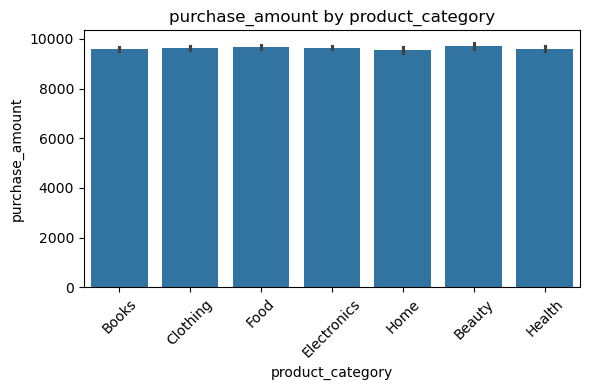

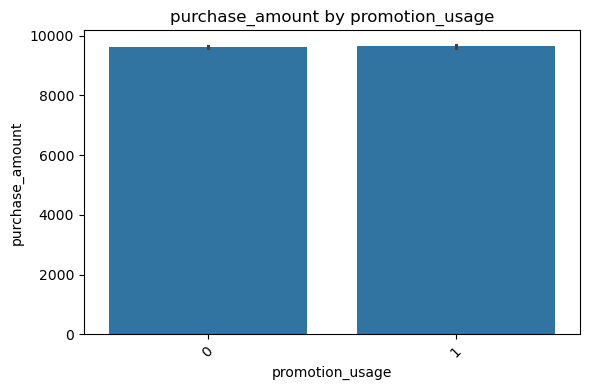

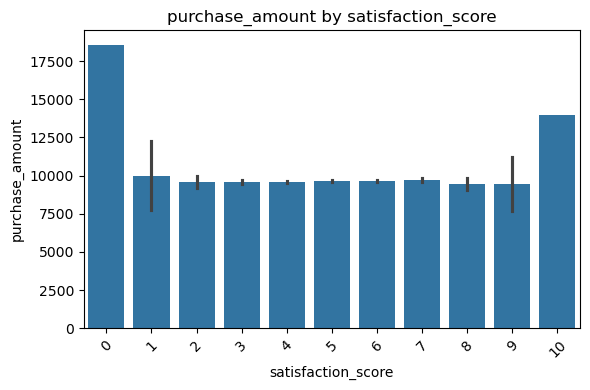

In [91]:
# Bivariate Analysis

# Numerical and categorical columns
numerical_col = [
    'age', 'income', 'purchase_amount',
    
]

categorical_col = [
    'gender', 'education', 'region',
    'loyalty_status', 'purchase_frequency', 'product_category',
    'promotion_usage', 'satisfaction_score'
]

# Pairwise scatter plots for numerical vs numerical
print("Generating Numerical vs Numerical scatter plots...")
for i in range(len(numerical_col)):
    for j in range(i + 1, len(numerical_col)):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=numerical_col[i], y=numerical_col[j], hue='gender', alpha=0.6)
        plt.title(f"{numerical_col[i]} vs {numerical_col[j]}")
        plt.tight_layout()
        plt.show()

# Plots for numerical vs categorical
print("Generating Numerical vs Categorical box plots...")
for num_col in numerical_col:
    for cat_col in categorical_col:
        plt.figure(figsize=(6, 4))
        sns.barplot(data=df, x=cat_col, y=num_col)
        plt.title(f"{num_col} by {cat_col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()



In [92]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['education'] = le.fit_transform(df['education'])
df['loyalty_status'] = le.fit_transform(df['loyalty_status'])
df['region']=le.fit_transform(df['region'])
df['purchase_frequency']=le.fit_transform(df['purchase_frequency'])
df['product_category']=le.fit_transform(df['product_category'])

In [93]:
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,1,40682,0,0,0,0,18249,1,0,6
1,2,29,1,15317,3,3,1,2,4557,2,1,6
2,3,37,1,38849,0,3,2,2,11822,2,0,6
3,4,30,1,11568,2,2,1,0,4098,4,0,7
4,5,31,0,46952,1,1,1,1,19685,2,1,5


id: Dropped because it is a unique identifier with no predictive or clustering value. It does not contribute to any meaningful pattern or relationship.

gender: Dropped due to equal distribution and no significant behavioral differences, making it non-informative for clustering.

age: Dropped as it showed minimal impact on customer grouping and could introduce noise without clear cluster separation.

In [94]:
df=df.drop(['id','age','gender'],axis=1)

In [95]:
features = [ 'income','education','loyalty_status','region','product_category', 'purchase_frequency', 'purchase_amount','promotion_usage','satisfaction_score']
X=df[features]

<Axes: >

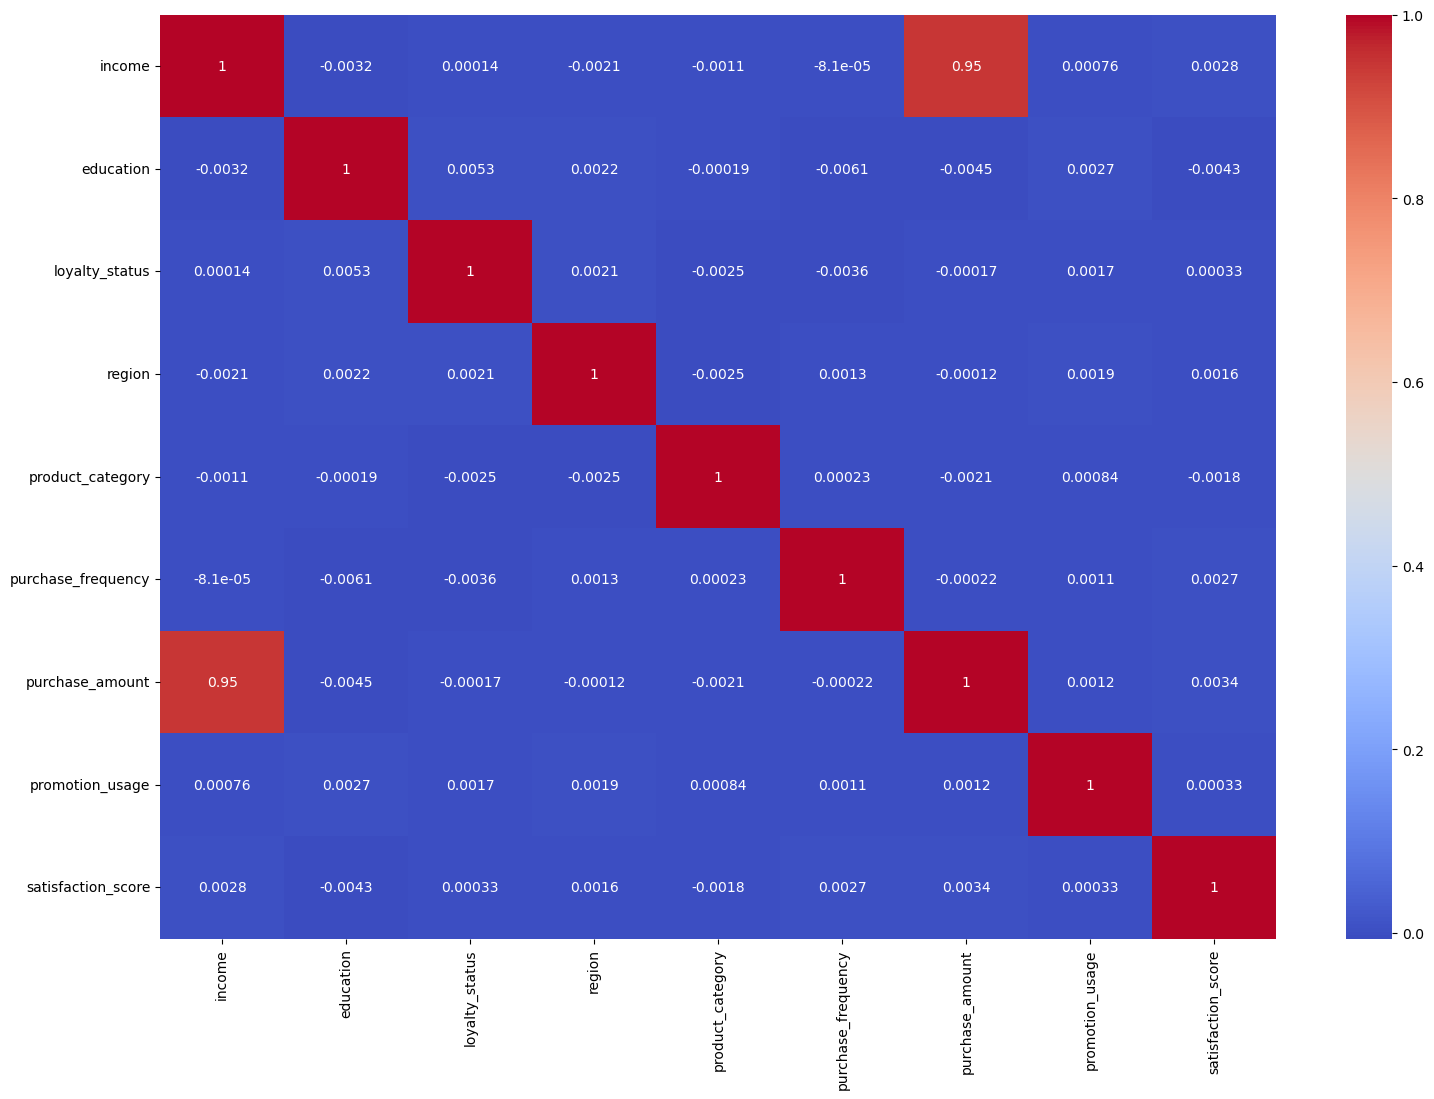

In [96]:
plt.figure(figsize=(18,12))
sns.heatmap(X.corr(),annot=True,cmap='coolwarm')

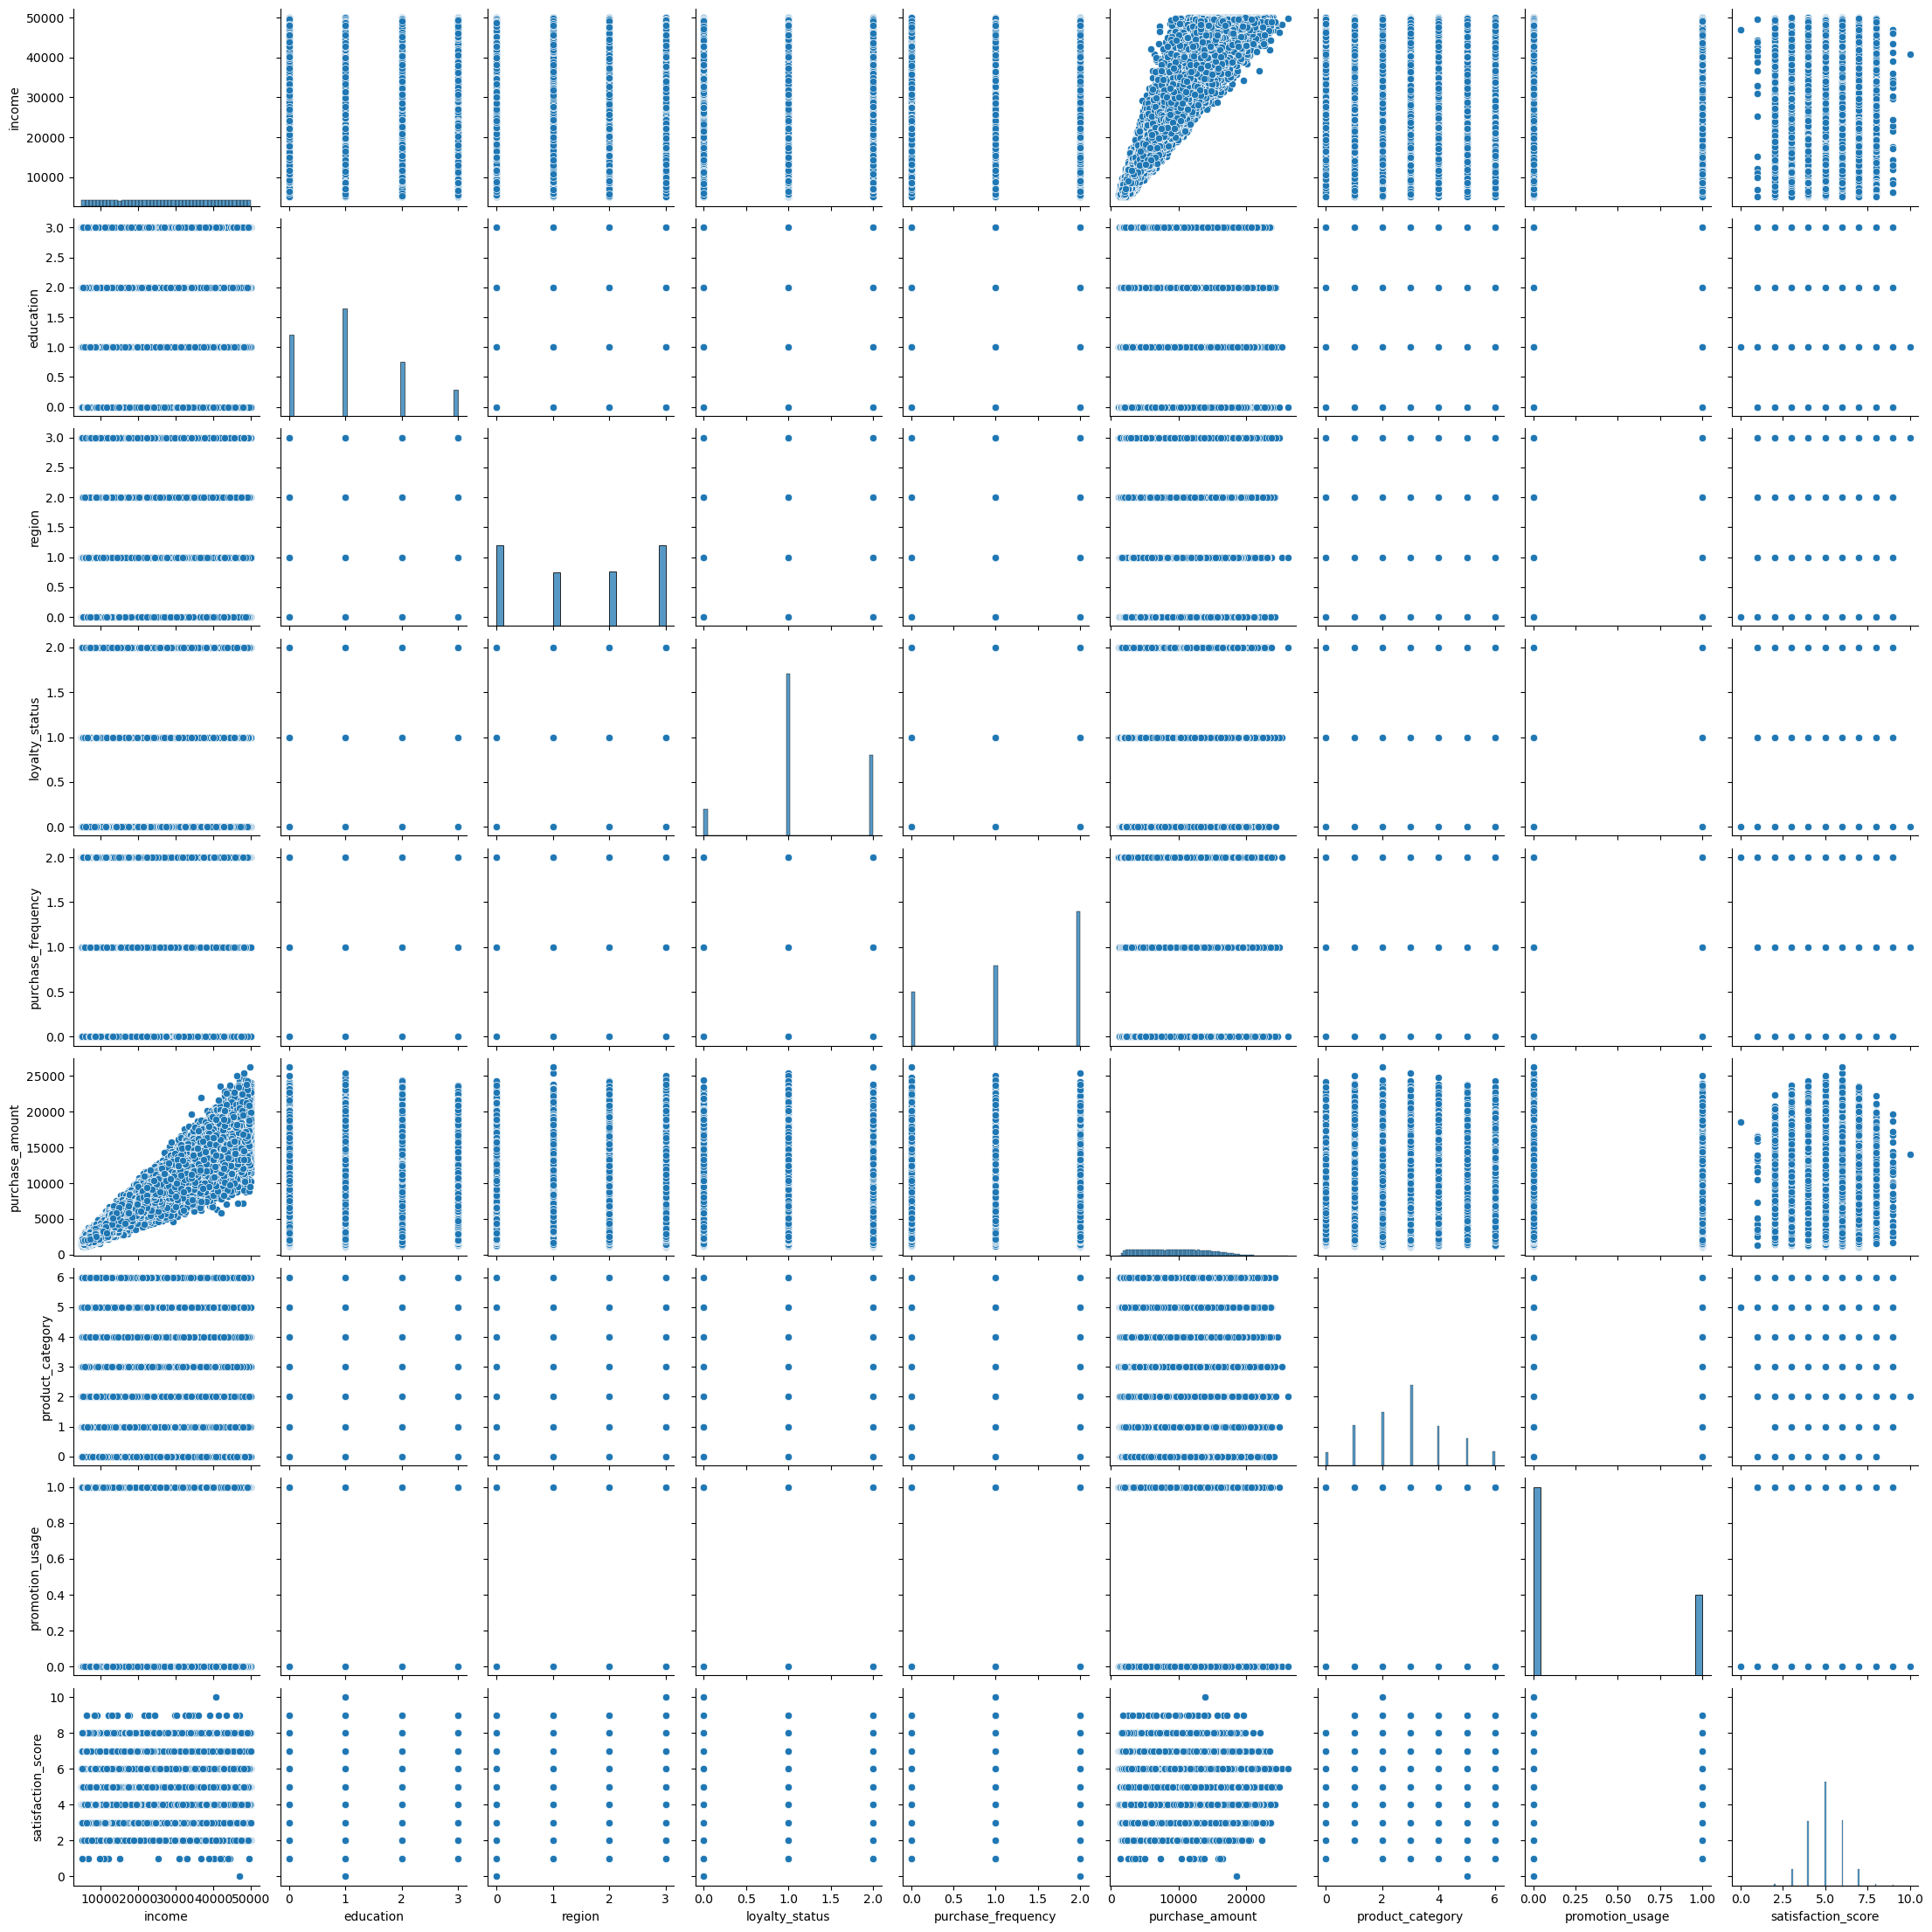

In [97]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df)
plt.show()

In [98]:
from sklearn.cluster import KMeans
WCSS=[]
for i in range (1,21):
    km=KMeans(n_clusters=i)
    km.fit_predict(X)
    WCSS.append(km.inertia_)

In [99]:
WCSS

[19194810411077.58,
 4956708066371.774,
 2326011157014.2812,
 1398687306496.0757,
 972846101660.929,
 733728587406.5958,
 597542994852.6228,
 505231727185.82776,
 441934052642.2185,
 397929939135.761,
 360496064878.3415,
 328509351473.4351,
 301323693248.7069,
 278540064852.37427,
 258467054643.29272,
 241670042677.0636,
 229954949603.0968,
 218223472757.82666,
 207516692993.59064,
 195965160187.61414]

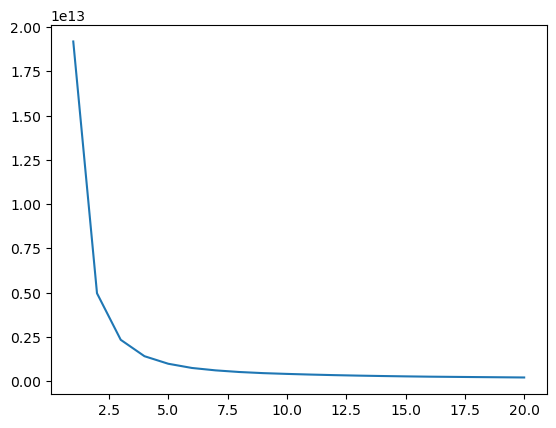

In [100]:
plt.plot(range(1,21),WCSS)

In [101]:
X=df.iloc[:,[0,5]]

In [102]:
X

,income,purchase_amount
0,40682,18249
1,15317,4557
2,38849,11822
3,11568,4098
4,46952,19685
...,...,...
99995,19691,7075
99996,17428,6873
99997,13222,5152
99998,40093,16312


In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [104]:
from sklearn.cluster import KMeans


In [105]:
model=KMeans(n_clusters=5,random_state=42)
kmean_labels=model.fit_predict(scaled_data)

In [106]:
kmean_labels

array([3, 0, 4, ..., 0, 3, 1])

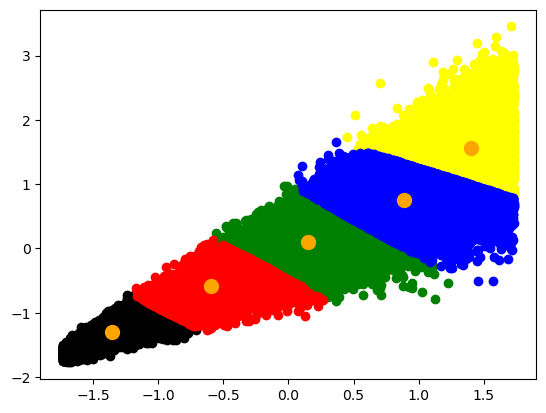

In [107]:
plt.scatter(scaled_data[kmean_labels==0,0],scaled_data[kmean_labels==0,1],color='black')
plt.scatter(scaled_data[kmean_labels==1,0],scaled_data[kmean_labels==1,1],color='green')
plt.scatter(scaled_data[kmean_labels==2,0],scaled_data[kmean_labels==2,1],color='red')
plt.scatter(scaled_data[kmean_labels==3,0],scaled_data[kmean_labels==3,1],color='yellow')
plt.scatter(scaled_data[kmean_labels==4,0],scaled_data[kmean_labels==4,1],color='blue')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],s=100,c='orange')

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data,kmean_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.46031105720878435


In [110]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
score = davies_bouldin_score(scaled_data,kmean_labels)
print("davies_bouldin_score:", score)
score = calinski_harabasz_score(scaled_data,kmean_labels)
print("calinski_harabasz_score:", score)

davies_bouldin_score: 0.6961745956125454
calinski_harabasz_score: 342399.66856652906


1. Silhouette Score: 0.463
Range: [-1, 1], with higher values better
This is a moderate-to-good score.
2. Davies-Bouldin Index: 0.696
Range: [0, ∞], with lower values better.
Your Score: 0.696
This is a good score (values < 1 are typically seen as strong).
3. Calinski-Harabasz Index: 342,399.66
Range: [0, ∞], with higher values better.
Your Score: 342,399.66
This is a very high score
High inter-cluster separation
Low intra-cluster dispersion



In [111]:
from sklearn.metrics import silhouette_score
for k in range(5, 10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_data)
    score = silhouette_score(scaled_data,kmean_labels)
    print(f"k={k}, silhouette score={score:.4f}")

k=5, silhouette score=0.4603
k=6, silhouette score=0.4603
k=7, silhouette score=0.4603
k=8, silhouette score=0.4603
k=9, silhouette score=0.4603


In [113]:
from sklearn.decomposition import PCA

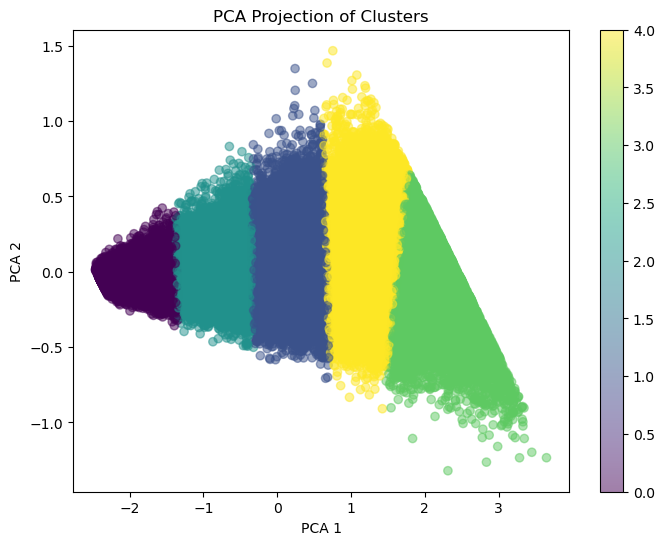

In [114]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmean_labels, cmap='viridis', alpha=0.5)
plt.title("PCA Projection of Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()
plt.show()

In [129]:
from sklearn.cluster import DBSCAN

In [ ]:
model=DBSCAN()
model.fit(scaled_data)